<a href="https://colab.research.google.com/github/syalamanchili0/superhero_assignment/blob/main/python/superhero_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [1]:
import sqlite3

# Connect to an in-memory SQLite database
conn = sqlite3.connect('superhero_db.sqlite')
cursor = conn.cursor()

# DDL statements (using SQLite syntax)
ddl_statements = '''
CREATE TABLE IF NOT EXISTS heroes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    power TEXT NOT NULL,
    team TEXT
);

CREATE TABLE IF NOT EXISTS villains (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    evil_plan TEXT NOT NULL
);

CREATE TABLE IF NOT EXISTS battles (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER,
    villain_id INTEGER,
    outcome TEXT NOT NULL,
    FOREIGN KEY(hero_id) REFERENCES heroes(hero_id),
    FOREIGN KEY(villain_id) REFERENCES villains(villain_id)
);
'''

# Execute the DDL script
cursor.executescript(ddl_statements)
conn.commit()
print('Database schema created successfully.')

Database schema created successfully.


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [3]:
import pandas as pd

# import the csv files
initial_heroes = pd.read_csv("heroes.csv")
initial_villains = pd.read_csv("villains.csv")
initial_battles = pd.read_csv("battles.csv")

# verify data has been inserted
initial_heroes.head()
initial_villains.head()
initial_battles.head()

,id,hero_id,villain_id,outcome
0,1,1,10,Villain Wins
1,2,9,3,Hero Wins
2,3,8,1,Draw
3,4,5,4,Villain Wins
4,5,1,7,Hero Wins


## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [4]:
# insert data from DataFrame into heroes table
initial_heroes.to_sql('heroes', conn, if_exists='replace', index=False)
print("Data from CSV has been inserted into the heroes table.")

# retrieve all superheroes and their powers
cursor.execute("SELECT heroes.name, heroes.power FROM heroes")
heroes_superheroes = cursor.fetchall()
print("All superheroes and their powers:")
for row in heroes_superheroes:
    print(row)

# insert data from DataFrame into battles table
initial_battles.to_sql('battles', conn, if_exists='replace', index=False)
print("Data from CSV has been inserted into the batles table.")

# retrieve all battles where the superhero won
cursor.execute("SELECT heroes.name, battles.id FROM battles JOIN heroes ON battles.hero_id = heroes.id WHERE outcome = 'Hero Wins'")
battles_hero_won = cursor.fetchall()
print("Battles where the superhero won:")
for row in battles_hero_won:
    print(row)

# insert data from DataFrame into battles table
initial_villains.to_sql('villains', conn, if_exists='replace', index=False)
print("Data from CSV has been inserted into the villains table.")


# list all villains and their evil plans
cursor.execute("SELECT villains.name, villains.evil_plan FROM villains")
villains_plan = cursor.fetchall()
print("All villains and their evil plans:")
for row in villains_plan:
    print(row)

# determine which superhero has fought the most battles
cursor.execute("SELECT heroes.name, COUNT(*) AS battles_won FROM battles JOIN heroes ON battles.hero_id = heroes.id WHERE battles.outcome = 'Hero Wins' GROUP BY heroes.name ORDER BY battles_won DESC LIMIT 1")
max_superhero = cursor.fetchall()
print("The superhero who won the most battles:")
for row in max_superhero:
    print(row)


Data from CSV has been inserted into the heroes table.
All superheroes and their powers:
('Spider-Man', 'Web-slinging')
('Iron Man', 'Powered Armor')
('Batman', 'Genius Detective')
('Superman', 'Super Strength')
('Thor', 'God of Thunder')
('Wonder Woman', 'Amazonian Strength')
('Black Panther', 'Enhanced Agility')
('The Flash', 'Super Speed')
('Hulk', 'Super Strength')
('Doctor Strange', 'Mystic Arts')
Data from CSV has been inserted into the batles table.
Battles where the superhero won:
('Hulk', 2)
('Spider-Man', 5)
('Hulk', 7)
('Batman', 8)
('Black Panther', 9)
('The Flash', 13)
('Batman', 20)
('Batman', 29)
('Thor', 30)
Data from CSV has been inserted into the villains table.
All villains and their evil plans:
('Green Goblin', 'Terrorize New York')
('Thanos', 'Collect all Infinity Stones')
('Joker', 'Spread chaos in Gotham')
('Lex Luthor', 'Defeat Superman')
('Loki', 'Trick humanity into worshiping him')
('Ultron', 'AI world domination')
('Darkseid', 'Control the universe')
('Venom

## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [14]:
# custom feature
# unique battle locations for each battle
battle_locations_data = [
    (1, "New York City"),
    (2, "Desert Battlefield"),
    (3, "Central City"),
    (4, "Asgard"),
    (5, "New York City"),
    (6, "Stark Tower"),
    (7, "Desert Battlefield"),
    (8, "Gotham City"),
    (9, "Wakanda"),
    (10, "Gotham City"),
    (11, "Sanctum Sanctorum"),
    (12, "Themyscira"),
    (13, "Central City"),
    (14, "Wakanda"),
    (15, "LexCorp Headquarters"),
    (16, "Oscorp Tower"),
    (17, "Titan"),
    (18, "Apokolips"),
    (19, "Arkham Asylum"),
    (20, "Gotham City"),
    (21, "Genosha"),
    (22, "San Francisco"),
    (23, "Hydra Base"),
    (24, "Sokovia"),
    (25, "Jotunheim"),
    (26, "San Francisco"),
    (27, "Stark Tower"),
    (28, "New York City"),
    (29, "Gotham City"),
    (30, "Asgard")
]

# insert data into battles table
cursor.executemany('''
UPDATE battles
SET location = ?
WHERE id = ?
''', [(location, battle_id) for battle_id, location in battle_locations_data])

# commit the transaction
conn.commit()

print("Data inserted into the battles table!")

# query to retrieve meaningful insights from new table
cursor.execute("""
SELECT location, COUNT(*) AS battle_count
FROM battles
GROUP BY location
ORDER BY battle_count DESC
""")
location_insights = cursor.fetchall()

print("Number of battles in each location:")
for row in location_insights:
    print(f"Location: {row[0]}, Battles: {row[1]}")


Data inserted into the battles table!
Number of battles in each location:
Location: Gotham City, Battles: 4
Location: New York City, Battles: 3
Location: Wakanda, Battles: 2
Location: Stark Tower, Battles: 2
Location: San Francisco, Battles: 2
Location: Desert Battlefield, Battles: 2
Location: Central City, Battles: 2
Location: Asgard, Battles: 2
Location: Titan, Battles: 1
Location: Themyscira, Battles: 1
Location: Sokovia, Battles: 1
Location: Sanctum Sanctorum, Battles: 1
Location: Oscorp Tower, Battles: 1
Location: LexCorp Headquarters, Battles: 1
Location: Jotunheim, Battles: 1
Location: Hydra Base, Battles: 1
Location: Genosha, Battles: 1
Location: Arkham Asylum, Battles: 1
Location: Apokolips, Battles: 1


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

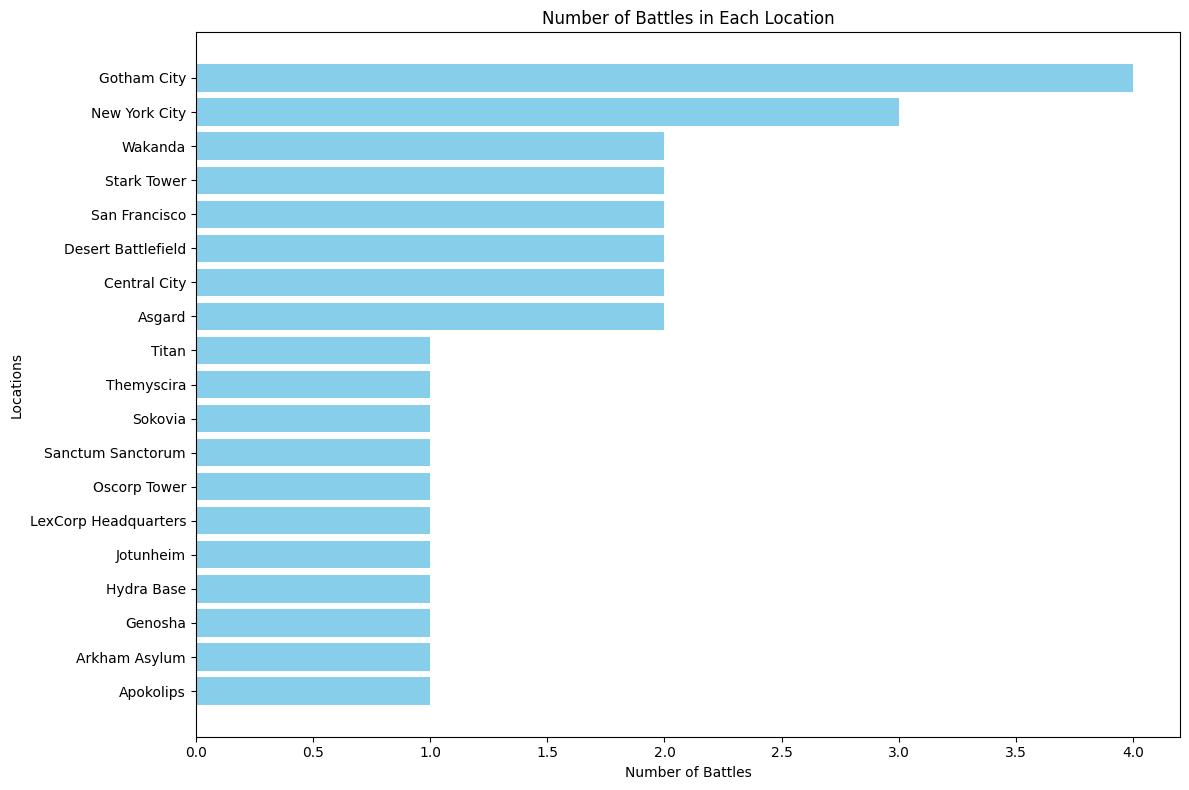

In [16]:
import matplotlib.pyplot as plt

# get data for the visualization
locations = [row[0] for row in location_insights]
battle_counts = [row[1] for row in location_insights]

# create bar chart to visualize the number of battles in each location
plt.figure(figsize=(12, 8))
plt.barh(locations, battle_counts, color='skyblue')
plt.xlabel("Number of Battles")
plt.ylabel("Locations")
plt.title("Number of Battles in Each Location")
plt.gca().invert_yaxis()  # invert the y-axis to show highest values at the top
plt.tight_layout()

# show the chart
plt.show()

## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!